In [3]:
import numpy as np
import pickle as pk
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
with open('/workspaces/pyskl/demo/results/long_view2_uncertainty.pkl', 'rb') as f:
    context = pk.load(f)
print(context.keys())

dict_keys(['predictions', 'uncertainties'])


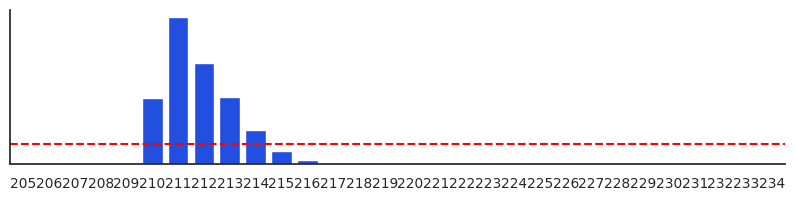

In [30]:
iters = [it for it in range(len(context['uncertainties']))]
uncertainties = np.array(context['uncertainties'])

plt.figure(figsize=(10, 2))
sns.set(style="white", font_scale=0.9)
sns.set_color_codes(palette='bright')
# plt.yscale('log')
# plt.xticks([])
plt.yticks([])
sns.despine(left=False, right=True, top=True, bottom=False)

# 使用barplot绘制柱状图
sns.barplot(x=iters[205:235], y=uncertainties[205:235], color="b")

plt.axhline(y=0.1, color='red', linestyle='--')

# 显示图表
# plt.show()
plt.savefig('/workspaces/pyskl/workspace/notebooks/long_horizon_sliding.svg', bbox_inches = 'tight')

In [32]:
with open('/workspaces/pyskl/demo/results/long_view2_uncertainty.pkl', 'rb') as f:
    context = pk.load(f)
print(context.keys())

dict_keys(['action', 'predictions', 'uncertainties'])


In [33]:
print(len(context['action']))
print(len(context['predictions']))
print(len(context['uncertainties']))

461
461
461


In [61]:
from collections import Counter

frames = len(context['action'])
start_idx = 20
window_size = 10
last = "none"
# right_action = ""
for idx in range(start_idx + window_size, frames):
    
    actions = np.array(context['action'][idx-window_size:idx])
    uncertainty = np.array(context['uncertainties'][idx-window_size:idx])
#     print(actions)
    
    action_map = Counter(actions)
#     print(action_map.most_common(1))
    
    selected = action_map.most_common(1)[0][0]
    action_num = action_map.most_common(1)[0][1]
    
    if action_num >= 8:
        action_idx = np.array([i for i, a in enumerate(actions) if a == selected])
        
        # 计算 uncertainty
        mean = np.mean(uncertainty[action_idx])
        if mean <= 0.1:            
            if last != selected:
                print(f"Action change: [ {last} --> {selected} ] || Robot: ")
                last = selected


Action change: [ none --> stand ] || Robot: 
Action change: [ stand --> polish ] || Robot: 
Action change: [ polish --> stand ] || Robot: 
Action change: [ stand --> right ] || Robot: 
Action change: [ right --> stand ] || Robot: 
Action change: [ stand --> assembly ] || Robot: 
Action change: [ assembly --> stand ] || Robot: 
Action change: [ stand --> left ] || Robot: 
Action change: [ left --> stand ] || Robot: 


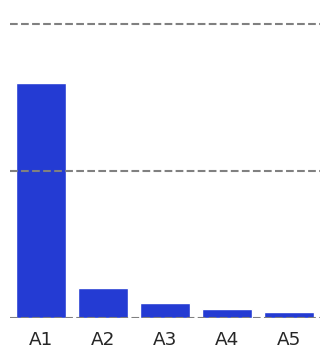

In [9]:
import numpy as np
import pickle as pk
import json
import seaborn as sns
import matplotlib.pyplot as plt

iters = ["A1", "A2", "A3", "A4", "A5"]
uncertainties = [0.8, 0.1, 0.05, 0.03, 0.02]

plt.figure(figsize=(4, 4))
sns.set(style="white", font_scale=1.2)
sns.set_color_codes(palette='bright')
# plt.yscale('log')
# plt.xticks([])
plt.yticks([])
# sns.despine(left=False, right=True, top=True, bottom=False)
sns.despine(left=True, right=True, top=True, bottom=True)

# 使用barplot绘制柱状图
sns.barplot(x=iters, y=uncertainties, color="#0725F0")

plt.axhline(y=0, color='grey', linestyle='--')
plt.axhline(y=0.5, color='grey', linestyle='--')
plt.axhline(y=1, color='grey', linestyle='--')

plt.savefig('/workspaces/pyskl/workspace/notebooks/one_action.svg', bbox_inches = 'tight')